In [4]:
!unzip datasets/DroneDatasetTrainSnippet.zip

Archive:  datasets/DroneDatasetTrainSnippet.zip
   creating: Drone_TrainSet_100Snippet/
  inflating: Drone_TrainSet_100Snippet/1007.jpg  
  inflating: Drone_TrainSet_100Snippet/1143.jpg  
  inflating: Drone_TrainSet_100Snippet/1324.jpg  
  inflating: Drone_TrainSet_100Snippet/1470.jpg  
  inflating: Drone_TrainSet_100Snippet/1561.jpg  
  inflating: Drone_TrainSet_100Snippet/167.jpg  
  inflating: Drone_TrainSet_100Snippet/1909.jpg  
  inflating: Drone_TrainSet_100Snippet/1992.jpg  
  inflating: Drone_TrainSet_100Snippet/2013.jpg  
  inflating: Drone_TrainSet_100Snippet/2020.jpg  
  inflating: Drone_TrainSet_100Snippet/2065.jpg  
  inflating: Drone_TrainSet_100Snippet/2077.jpg  
  inflating: Drone_TrainSet_100Snippet/2116.jpg  
  inflating: Drone_TrainSet_100Snippet/223.jpg  
  inflating: Drone_TrainSet_100Snippet/2428.jpg  
  inflating: Drone_TrainSet_100Snippet/2431.jpg  
  inflating: Drone_TrainSet_100Snippet/2436.jpg  
  inflating: Drone_TrainSet_100Snippet/2661.jpg  
  inflating: D

# Data exploration and preparation
Inspect train data and its annotation

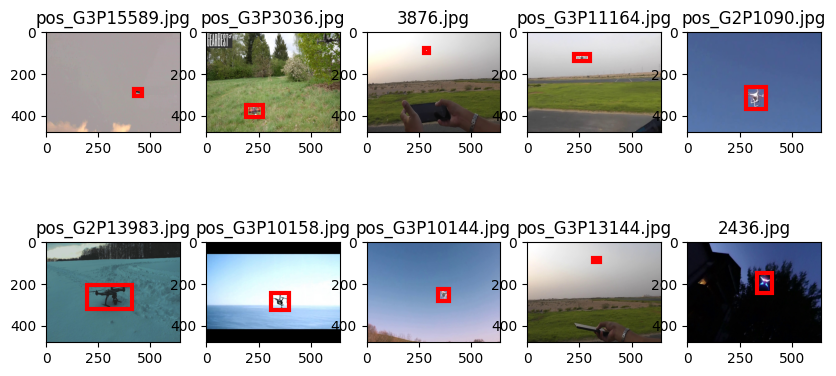

In [45]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import xml.etree.ElementTree as ET

plt.rcParams['figure.figsize'] = [10, 5]

image_files = os.listdir('Drone_TrainSet_100Snippet')
image_files_len = len(image_files)

# get 10 random images from dataset
idx = random.sample(range(image_files_len), 10)
fig, ax = plt.subplots(nrows=2, ncols=5)

def get_bounding_box_from_xml(file_path):
  tree = ET.parse(file_path)
  root = tree.getroot()
  xmin = root.find('object').find('bndbox').find('xmin').text
  ymin = root.find('object').find('bndbox').find('ymin').text
  xmax = root.find('object').find('bndbox').find('xmax').text
  ymax = root.find('object').find('bndbox').find('ymax').text

  x = int(xmin)
  y = int(ymin)
  width = int(xmax) - x
  height = int(ymax) - y
  return (x, y, width, height)


for i in range(5):
  id_1 = i * 2
  id_2 = i * 2 + 1

  img_1_path = image_files[idx[id_1]]
  img_2_path = image_files[idx[id_2]]

  img_1 = cv2.imread('Drone_TrainSet_100Snippet/' + img_1_path)
  img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
  img_2 = cv2.imread('Drone_TrainSet_100Snippet/' + img_2_path)
  img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

  img_1_xml = 'Drone_TrainSet_XMLs_100Snippet/' + img_1_path.replace('jpg', 'xml')
  x, y, width, height = get_bounding_box_from_xml(img_1_xml)
  rect_1 = patches.Rectangle((x, y), width, height, linewidth=3, edgecolor='r', facecolor='none')
  plt.subplot(2, 5, id_1 + 1), plt.title(img_1_path), ax[0][i].imshow(img_1), ax[0][i].add_patch(rect_1)

  img_2_xml = 'Drone_TrainSet_XMLs_100Snippet/' + img_2_path.replace('jpg', 'xml')
  x, y, width, height = get_bounding_box_from_xml(img_2_xml)
  rect_2 = patches.Rectangle((x, y), width, height, linewidth=3, edgecolor='r', facecolor='none')
  plt.subplot(2, 5, id_2 + 1), plt.title(img_2_path), ax[1][i].imshow(img_2), ax[1][i].add_patch(rect_2)
